In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import scipy.spatial as spatial
from scipy.spatial import Voronoi, voronoi_plot_2d

from scipy.spatial import cKDTree

path_base = "./IMG/"

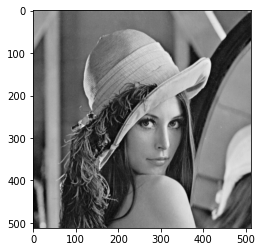

In [4]:
lena = cv2.imread(path_base + "lena_gray_512.tif", 0)
plt.imshow(lena, "gray")

In [5]:
block_size = (2,2)
N = 32

init_vectors = np.random.rand(N, 4)
codebook = dict(list(enumerate(init_vectors)))
print(codebook)

{0: array([0.81086822, 0.08295669, 0.27604005, 0.63200758]), 1: array([0.44525255, 0.04508982, 0.45061259, 0.88168362]), 2: array([0.65466368, 0.0965109 , 0.52155335, 0.51975862]), 3: array([0.46317805, 0.97691068, 0.98438876, 0.91463885]), 4: array([0.59146557, 0.03590847, 0.77175193, 0.35958649]), 5: array([0.78912452, 0.24760723, 0.0096744 , 0.79074679]), 6: array([0.9573804 , 0.87320087, 0.45046386, 0.22529972]), 7: array([0.7362053 , 0.34161982, 0.76674026, 0.66184995]), 8: array([0.1300759 , 0.31754822, 0.91516917, 0.50016603]), 9: array([0.41591949, 0.04822684, 0.13123257, 0.59623124]), 10: array([0.46329497, 0.01087865, 0.8059624 , 0.6973877 ]), 11: array([0.10955324, 0.29373505, 0.42713543, 0.54204396]), 12: array([0.3468971 , 0.7528784 , 0.73529017, 0.92388291]), 13: array([0.04375447, 0.26381312, 0.59242841, 0.12457348]), 14: array([0.04332916, 0.87038297, 0.85791278, 0.38415215]), 15: array([0.02108175, 0.74944006, 0.18603868, 0.76172814]), 16: array([0.59459521, 0.13574494

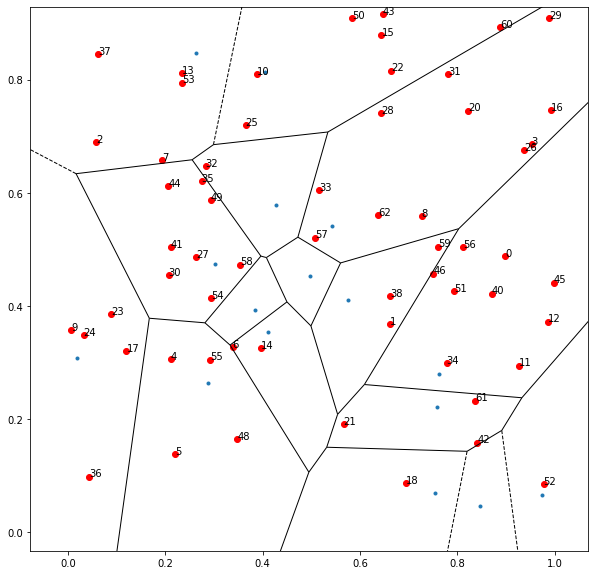

In [6]:
N = 16

toy_points = np.random.rand(64, 2)

points = np.random.rand(N, 2)
vor = Voronoi(points)

fig,ax = plt.subplots(1,1,figsize=(10,10))
voronoi_plot_2d(vor, ax, show_vertices = False)
plt.scatter(toy_points[:,0], toy_points[:,1],color = 'r')

for i in range(0,len(toy_points)):
    ax.annotate(i, (toy_points[:,0][i], toy_points[:,1][i]), size = 10)

In [7]:
from scipy.spatial import cKDTree

voronoi_kdtree = cKDTree(points)
test_point_dist, test_point_regions = voronoi_kdtree.query(toy_points)
test_point_regions

array([14,  3, 10,  4,  2,  2, 15, 10,  4,  7,  0, 14, 14, 10, 15,  0,  4,
        7, 11,  0,  4, 12,  0,  7,  7,  0,  4,  8,  4,  4,  8,  4,  5,  4,
       14,  8,  7, 10,  3,  0, 14,  8, 12,  0,  8, 14, 14,  0,  2,  8,  0,
       14,  9, 10,  8,  2, 14,  4,  8,  3,  0, 12,  4,  0])

In [8]:
new_points = np.zeros((N,2))
for i in range(N):
  indexes = np.where(test_point_regions==i)
  current_region_points = [toy_points[idx] for idx in indexes][0]
  print("Avg :" ,np.mean(current_region_points, axis=0))
  avg = np.mean(current_region_points, axis=0)
  if not np.isnan(avg).any():
    new_points[i] = avg
  else:
    new_points[i] = points[i]

print(new_points)

  

Avg : [0.62376959 0.88915445]
Avg : [nan nan]
Avg : [0.26786651 0.22848817]
Avg : [0.69457472 0.43011667]
Avg : [0.7730031  0.68699545]
Avg : [0.28305211 0.64665795]
Avg : [nan nan]
Avg : [0.05826973 0.30167285]
Avg : [0.26312932 0.51867201]
Avg : [0.97681916 0.08451911]
Avg : [0.15687897 0.75973389]
Avg : [0.69416307 0.08667341]
Avg : [0.74760464 0.19373436]
Avg : [nan nan]
Avg : [0.86805577 0.41152176]
Avg : [0.36706225 0.32640241]
[[0.62376959 0.88915445]
 [0.38516477 0.39298091]
 [0.26786651 0.22848817]
 [0.69457472 0.43011667]
 [0.7730031  0.68699545]
 [0.28305211 0.64665795]
 [0.8471658  0.04701077]
 [0.05826973 0.30167285]
 [0.26312932 0.51867201]
 [0.97681916 0.08451911]
 [0.15687897 0.75973389]
 [0.69416307 0.08667341]
 [0.74760464 0.19373436]
 [0.4971454  0.45328705]
 [0.86805577 0.41152176]
 [0.36706225 0.32640241]]


/home/nathan/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/nathan/.local/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


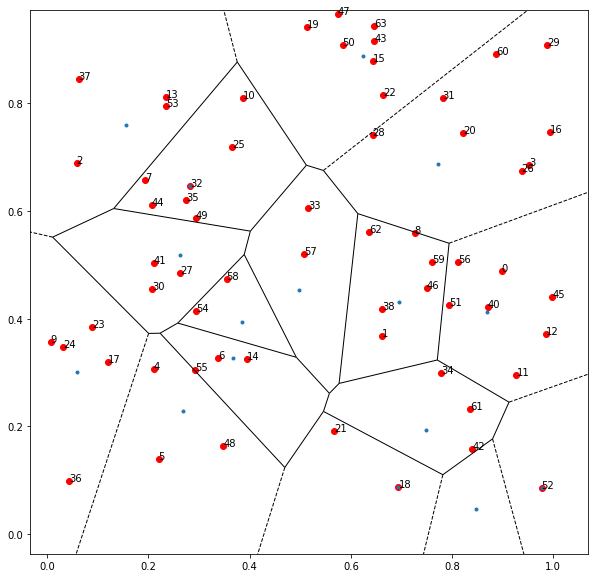

In [9]:
vor = Voronoi(new_points)

fig,ax = plt.subplots(1,1,figsize=(10,10))
voronoi_plot_2d(vor, ax, show_vertices = False)
plt.scatter(toy_points[:,0], toy_points[:,1],color = 'r')

for i in range(0,len(toy_points)):
    ax.annotate(i, (toy_points[:,0][i], toy_points[:,1][i]), size = 10)

In [10]:
def LBG_2D(input_vectors, N):
  codebook_vectors = np.random.rand(N, 2)
  codebook = dict(list(enumerate(codebook_vectors)))

  display_voronoi_diagram(codebook_vectors, input_vectors)
  LBG_2D_R(codebook, input_vectors, N, 0)

def LBG_2D_R(codebook, input_vectors, N, i):
  codebook_vectors = list(codebook.values())
  new_codebook_vectors = compute_new_vectors(codebook_vectors, input_vectors)

  display_voronoi_diagram(new_codebook_vectors, input_vectors)

  new_codebook = dict(list(enumerate(new_codebook_vectors)))

  if i < 10:
    return LBG_2D_R(new_codebook, input_vectors, N, i+1)
  else:
    return new_codebook

def display_voronoi_diagram(codebook_vectors, input_vectors):
  vor = Voronoi(codebook_vectors)

  fig,ax = plt.subplots(1,1,figsize=(10,10))
  voronoi_plot_2d(vor, ax, show_vertices = False)
  plt.scatter(input_vectors[:,0], input_vectors[:,1],color = 'r')

def compute_new_vectors(codebook_vectors,input_vectors):
  voronoi_kdtree = cKDTree(codebook_vectors)
  input_vectors_dist, input_vectors_regions = voronoi_kdtree.query(input_vectors)

  new_codebook_vectors = np.zeros((N,2))

  for i in range(N):
    indexes = np.where(input_vectors_regions==i)
    current_region_vectors = [input_vectors[idx] for idx in indexes][0]
    avg = np.mean(current_region_vectors, axis=0)
    if not np.isnan(avg).any():
      new_codebook_vectors[i] = avg
    else:
      new_codebook_vectors[i] = codebook_vectors[i]

  return new_codebook_vectors


/home/nathan/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/nathan/.local/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/home/nathan/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/nathan/.local/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/home/nathan/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/nathan/.local/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/home/nathan/.local/lib/p

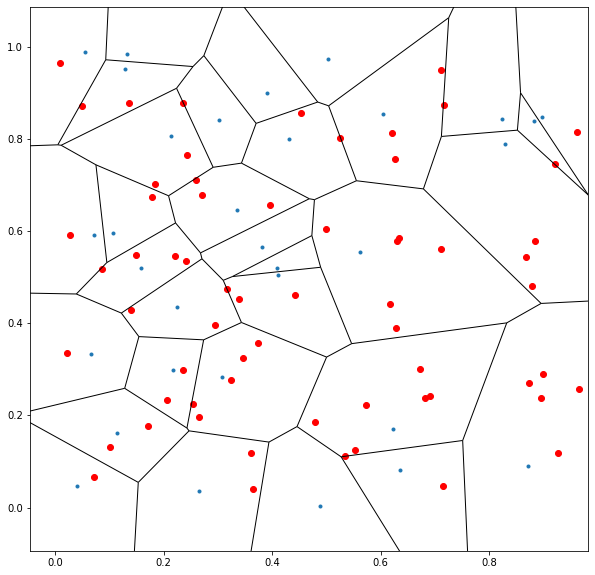

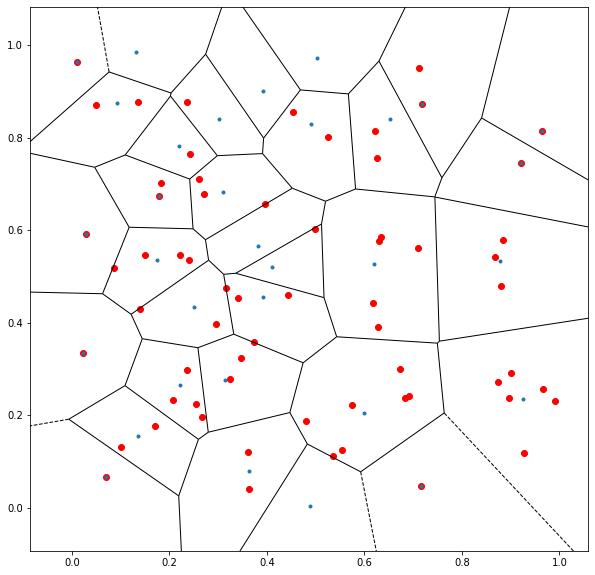

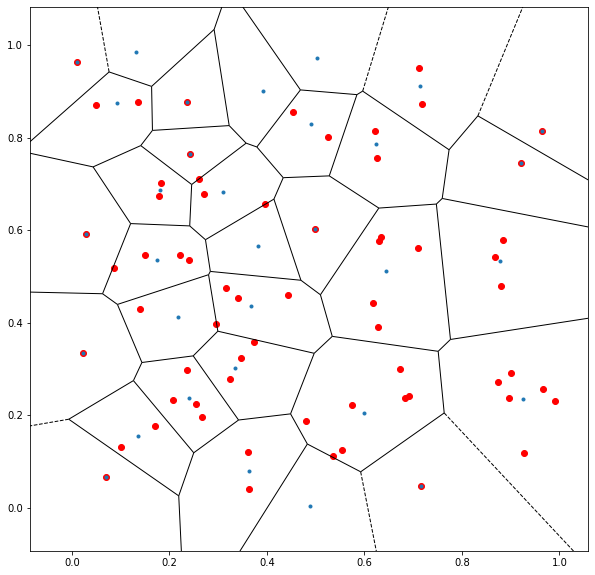

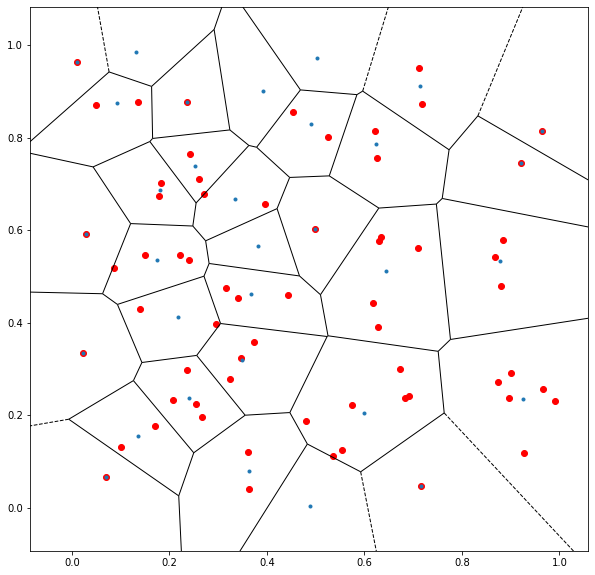

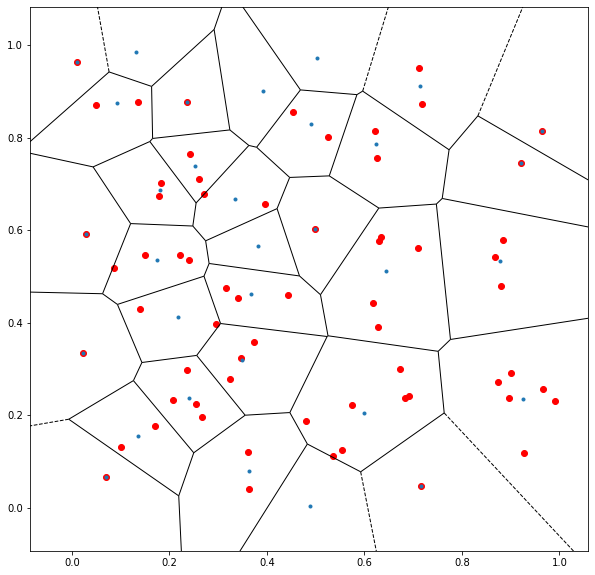

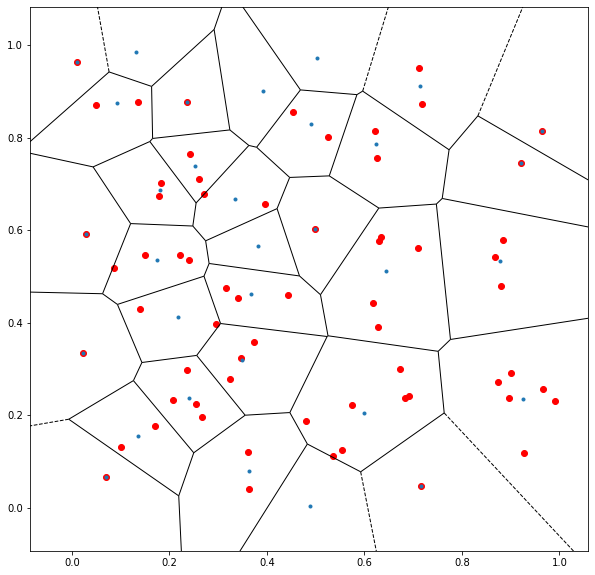

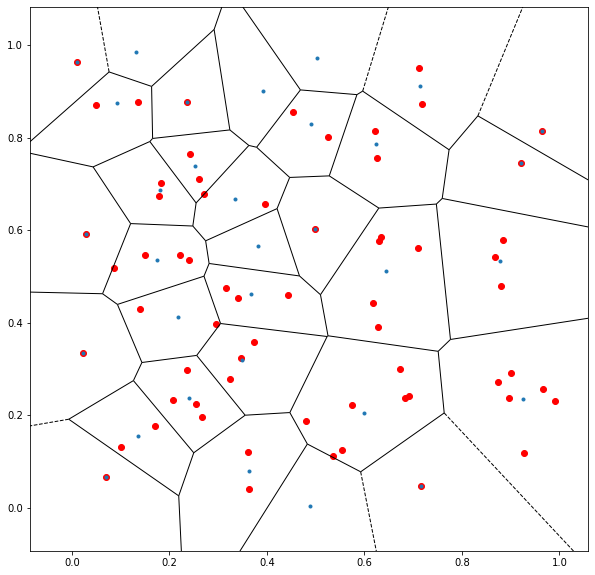

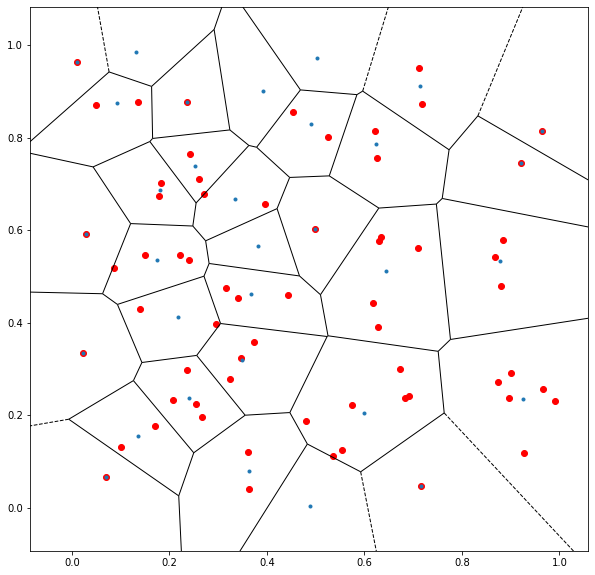

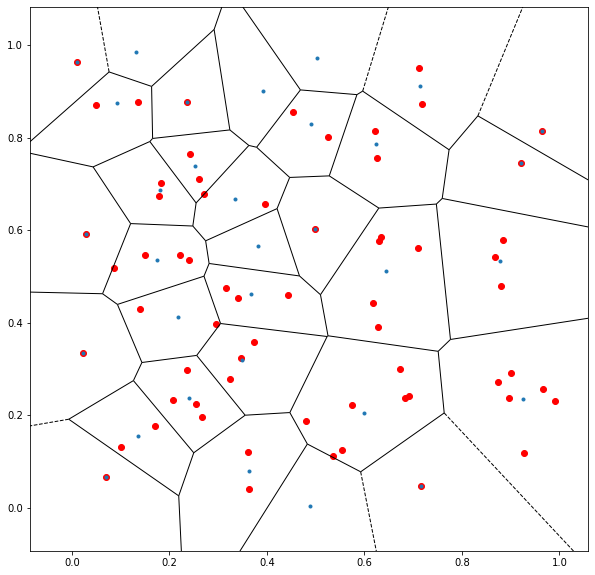

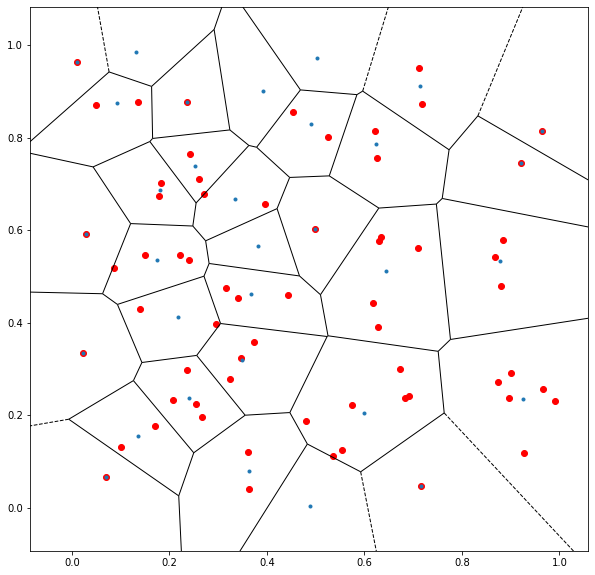

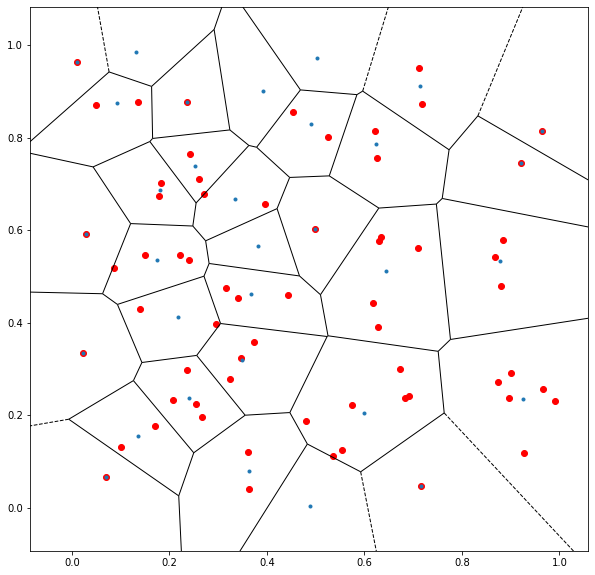

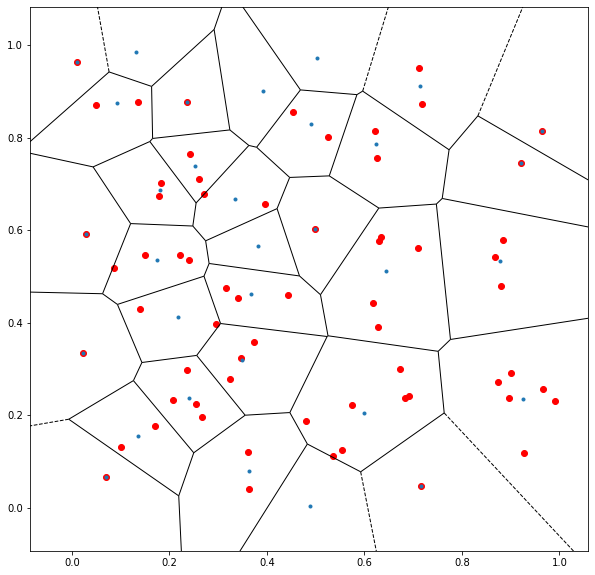

In [11]:
vectors = np.random.rand(64, 2)
N = 32

LBG_2D(vectors, N)